In [104]:
%matplotlib inline

import os
import scipy
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

PODS_DIR = "/Volumes/WorkDrive/msbayes-buffering/hickerlab-repository/msbayes-buffering/data/2x2/results/"
MODELS = ["dpp_sort", "dpp_usort", "unif_sort", "unif_usort"]
PODS_OUTDIRS = [PODS_DIR + x for x in MODELS]

EMPIRICAL_DIR = "/Volumes/WorkDrive/msbayes-buffering/hickerlab-repository/msbayes-buffering/data/empirical/results/"
MODELS = ["dirichlet_sort", "dirichlet_usort", "uniform_sort", "uniform_usort"]
FISH_OUTDIRS = [EMPIRICAL_DIR + "fish_" + x for x in MODELS]
FROG_OUTDIRS = [EMPIRICAL_DIR + "frogs_" + x for x in MODELS]


In [240]:
def plot2x2(OUTDIRS, xcol, ycol, xlim, ylim, title):
    f, axarr = plt.subplots(2, 2, figsize=(8,4), dpi=1000)
    axarr = [a for b in axarr for a in b]

    ## Set differences for psi vs omega
    if xcol == 0:
        param = "Psi"
        xmin = 1
        ymin = 1
        def jitter(arr):
            stdev = .01*(max(arr)-min(arr))
            return arr + np.random.randn(len(arr)) * stdev
    else:
        param = "Omega"
        xmin = 0
        ymin = 0
        def jitter(arr):
            return arr
        
    for RESULTS_DIR, ax in zip(OUTDIRS, axarr):
        RUN_NAME = RESULTS_DIR.split("/")[-1]

        print (RUN_NAME),
        df = pd.read_csv(RESULTS_DIR + "/results_psi_omega_et_tol.out", sep=" ", header=None)

        x = df[xcol]
        y = df[ycol]
        
        ## linregress gets the rvalue and polyfit/poly1d gives us the fit function so we can draw the regression line
        res = linregress(x,y)
        fit = np.polyfit(x, y, 1)
        fit_fn = np.poly1d(fit)

        ## Calculate RMSE
        err=scipy.sqrt(sum((x-y)**2)/float(len(x)))
        RMSE = "RMSE {0:.4f}".format(err)
        R2 = "R^2  {0:.4f}".format(res.rvalue**2)
        #print(RMSE, R2)

        ## Plot the data and the regression line
        ax.scatter(jitter(x), jitter(y), marker="o", color='w', edgecolors='black')
        pts = np.linspace(xmin, xlim)
        ax.plot(pts, fit_fn(pts), '-r')

        ## Set titles and x/y limits
        ax.set_xlabel("True {}".format(param), fontsize=10)
        ax.set_ylabel("Estimated {}".format(param), fontsize=10)
        ax.set_title(RUN_NAME, fontsize=10)
        ax.set_xlim(xmin, xlim)
        ax.set_ylim(ymin, ylim)

        ## Plot the identity line
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

        ## Add RMSE and R^2 to plots
        ax.text(0.2, 0.9, RMSE, ha='center', va='center', transform=ax.transAxes, color='r', size=8)
        ax.text(0.2, 0.78, R2, ha='center', va='center', transform=ax.transAxes, color='r', size=8)

        ## Remove the stupid tick spines
        ax.tick_params(axis=u'both', which=u'both',length=0)

    ## Give a little space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.suptitle(title, fontsize=13)


In [262]:
def plotRMSE(OUTDIRS, xcol, ycol, xlim, ylim, title):
    f, axarr = plt.subplots(2, 2, figsize=(8,4), dpi=1000)
    axarr = [a for b in axarr for a in b]

    ## Set differences for psi vs omega
    if xcol == 0:
        param = "Psi"
        xmin = 0
        ymin = 0
        def jitter(arr):
            stdev = .01*(max(arr)-min(arr))
            return arr + np.random.randn(len(arr)) * stdev
    else:
        param = "Omega"
        xmin = 0
        ymin = 0
        def jitter(arr):
            return arr
        
    for RESULTS_DIR, ax in zip(OUTDIRS, axarr):
        RUN_NAME = RESULTS_DIR.split("/")[-1]

        print (RUN_NAME),
        df = pd.read_csv(RESULTS_DIR + "/results_psi_omega_et_tol.out", sep=" ", header=None)

        x = df[xcol]
        y = df[ycol]
        
        ## Plot the data and the regression line
        ax.scatter(jitter(x), jitter(y), marker="o", color='w', edgecolors='black')

        ## Calculate and plot the mean RMSE
        RMSE = "Mean RMSE {0:.4f}".format(np.mean(y))
        ax.text(0.2, 0.9, RMSE, ha='center', va='center', transform=ax.transAxes, color='r', size=8)

        ## Set titles and x/y limits
        ax.set_xlabel("True {}".format(param), fontsize=10)
        ax.set_ylabel("RMSE est. {}".format(param), fontsize=10)
        ax.set_title(RUN_NAME, fontsize=10)
        ax.set_xlim(xmin, xlim)
        ax.set_ylim(ymin, ylim)

        ## Remove the stupid tick spines
        ax.tick_params(axis=u'both', which=u'both',length=0)

    ## Give a little space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.suptitle(title, fontsize=13)


dpp_sort dpp_usort unif_sort unif_usort dpp_sort dpp_usort unif_sort unif_usort dpp_sort dpp_usort unif_sort unif_usort


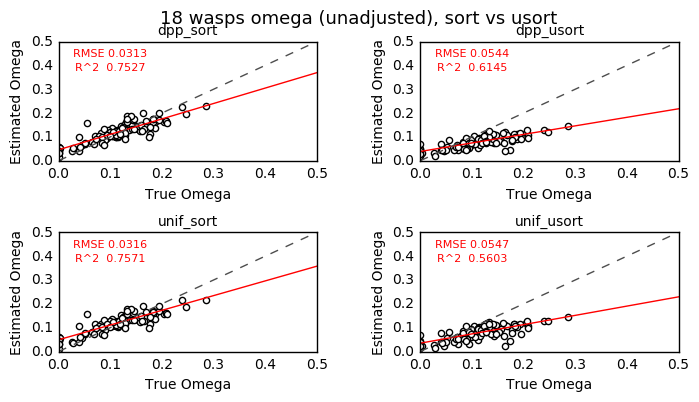

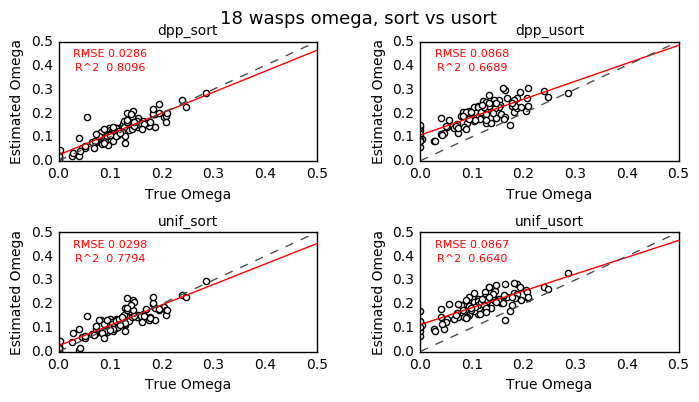

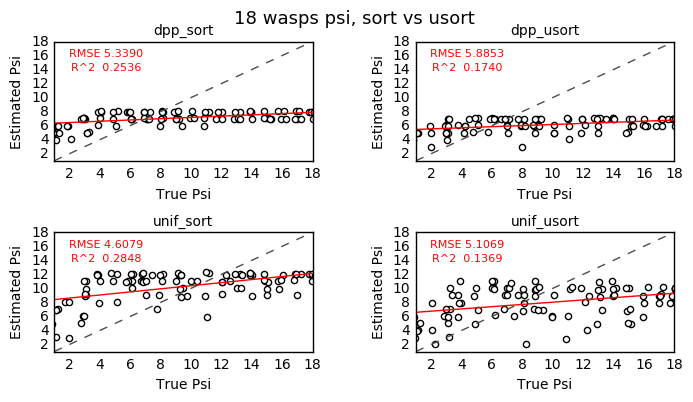

In [241]:
## Use column 6 to plot unadjusted omega values
plot2x2(PODS_OUTDIRS, 3, 6, 0.5, 0.5, "18 wasps omega (unadjusted), sort vs usort")
plot2x2(PODS_OUTDIRS, 3, 4, 0.5, 0.5, "18 wasps omega, sort vs usort")
plot2x2(PODS_OUTDIRS, 0, 1, 18, 18, "18 wasps psi, sort vs usort")

fish_dirichlet_sort fish_dirichlet_usort fish_uniform_sort fish_uniform_usort fish_dirichlet_sort fish_dirichlet_usort fish_uniform_sort fish_uniform_usort fish_dirichlet_sort fish_dirichlet_usort fish_uniform_sort fish_uniform_usort


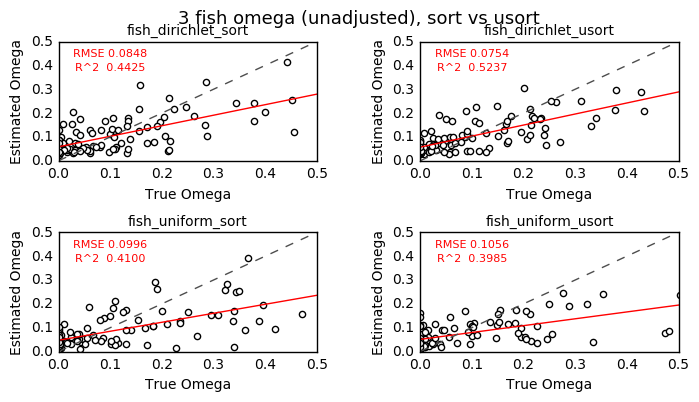

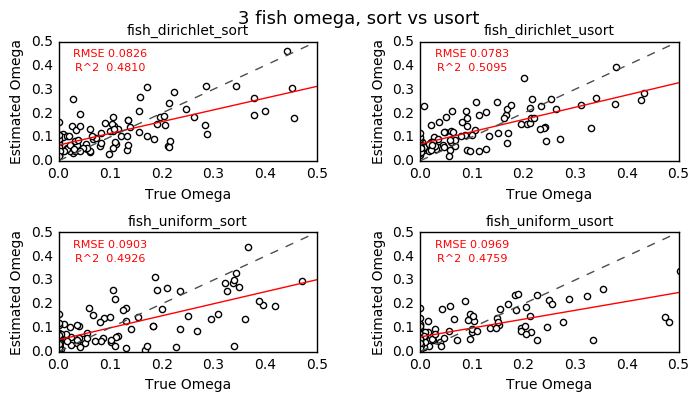

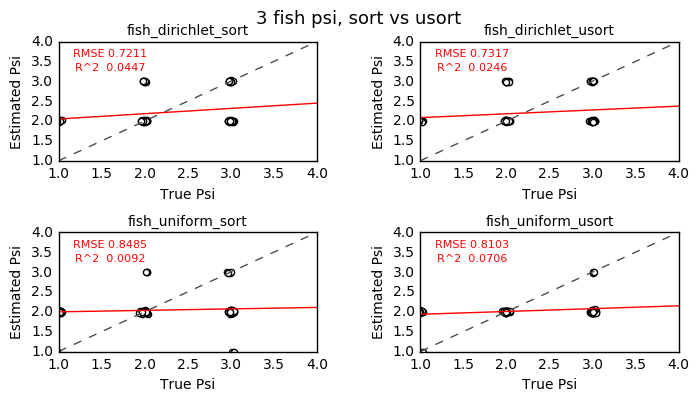

In [242]:
plot2x2(FISH_OUTDIRS, 3, 6, 0.5, 0.5, "3 fish omega (unadjusted), sort vs usort")
plot2x2(FISH_OUTDIRS, 3, 4, 0.5, 0.5, "3 fish omega, sort vs usort")
plot2x2(FISH_OUTDIRS, 0, 1, 4, 4, "3 fish psi, sort vs usort")

frogs_dirichlet_sort ('RMSE 0.1202', 'R^2  0.6704')
frogs_dirichlet_usort ('RMSE 0.1530', 'R^2  0.5435')
frogs_uniform_sort ('RMSE 0.1151', 'R^2  0.5946')
frogs_uniform_usort ('RMSE 0.1279', 'R^2  0.7080')
frogs_dirichlet_sort ('RMSE 0.1158', 'R^2  0.7183')
frogs_dirichlet_usort ('RMSE 0.1630', 'R^2  0.5413')
frogs_uniform_sort ('RMSE 0.1243', 'R^2  0.5941')
frogs_uniform_usort ('RMSE 0.1242', 'R^2  0.7596')
frogs_dirichlet_sort ('RMSE 0.8602', 'R^2  0.1167')
frogs_dirichlet_usort ('RMSE 0.9000', 'R^2  0.0244')
frogs_uniform_sort ('RMSE 0.9695', 'R^2  0.3640')
frogs_uniform_usort ('RMSE 0.9592', 'R^2  0.2497')


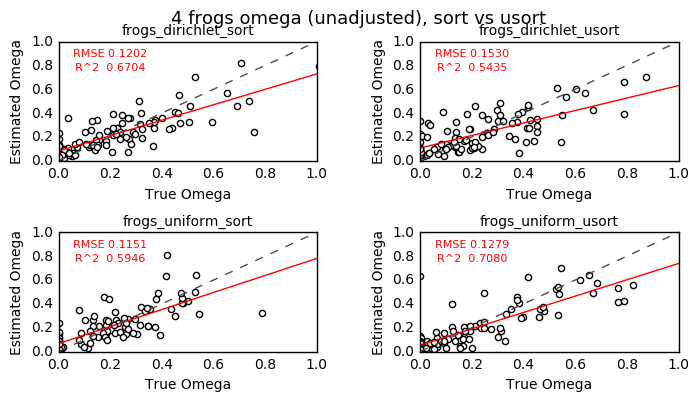

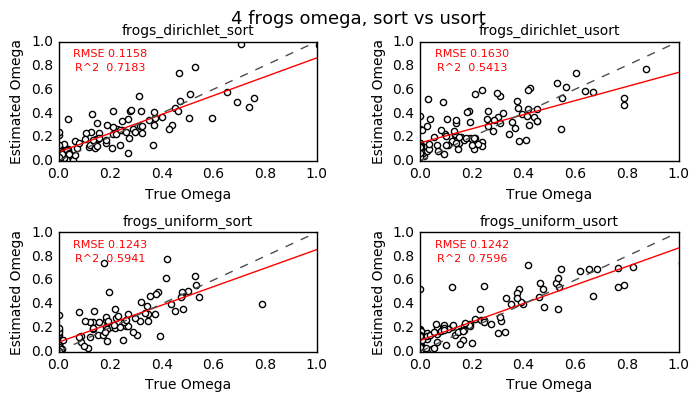

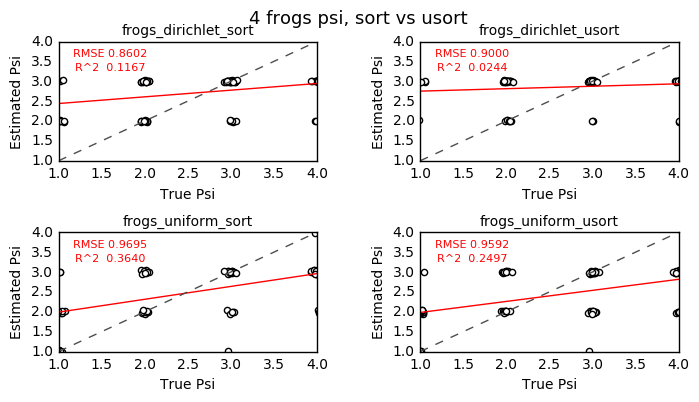

In [239]:
plot2x2(FROG_OUTDIRS, 3, 6, 1, 1, "4 frogs omega (unadjusted), sort vs usort")
plot2x2(FROG_OUTDIRS, 3, 4, 1, 1, "4 frogs omega, sort vs usort")
plot2x2(FROG_OUTDIRS, 0, 1, 4, 4, "4 frogs psi, sort vs usort")

dpp_sort dpp_usort unif_sort unif_usort dpp_sort dpp_usort unif_sort unif_usort


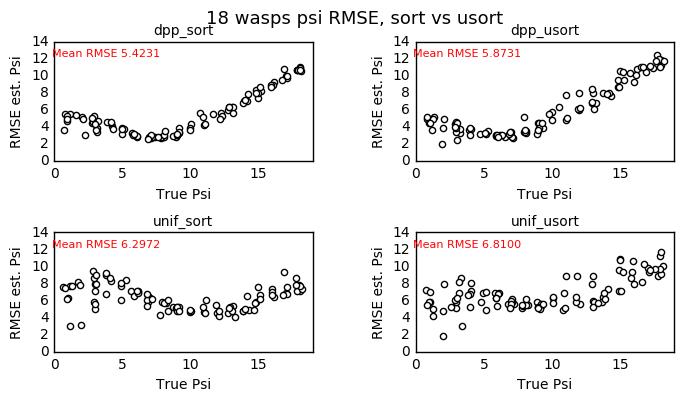

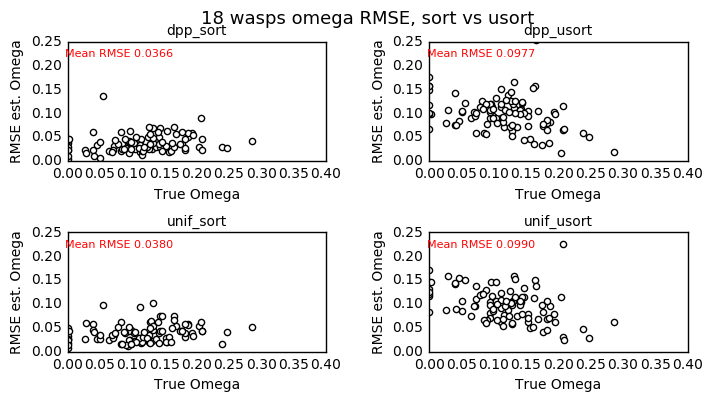

In [270]:
plotRMSE(PODS_OUTDIRS, 0, 2, 19, 14, "18 wasps psi RMSE, sort vs usort")
plotRMSE(PODS_OUTDIRS, 3, 5, .4, .25, "18 wasps omega RMSE, sort vs usort")

fish_dirichlet_sort fish_dirichlet_usort fish_uniform_sort fish_uniform_usort fish_dirichlet_sort fish_dirichlet_usort fish_uniform_sort fish_uniform_usort


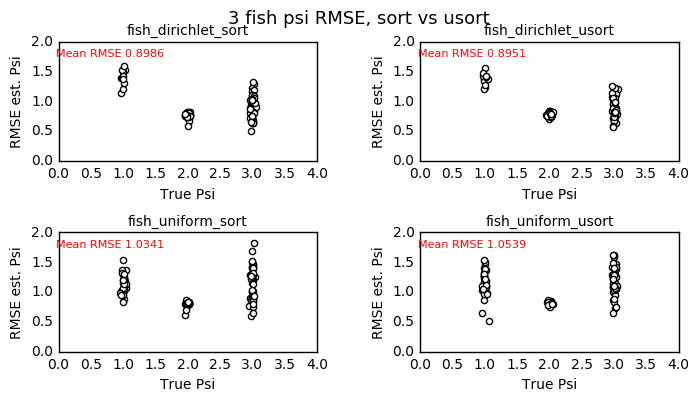

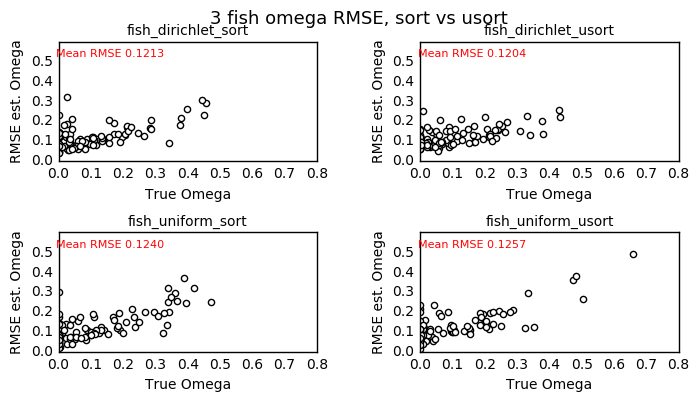

In [266]:
plotRMSE(FISH_OUTDIRS, 0, 2, 4, 2, "3 fish psi RMSE, sort vs usort")
plotRMSE(FISH_OUTDIRS, 3, 5, .8, .6, "3 fish omega RMSE, sort vs usort")

frogs_dirichlet_sort frogs_dirichlet_usort frogs_uniform_sort frogs_uniform_usort frogs_dirichlet_sort frogs_dirichlet_usort frogs_uniform_sort frogs_uniform_usort


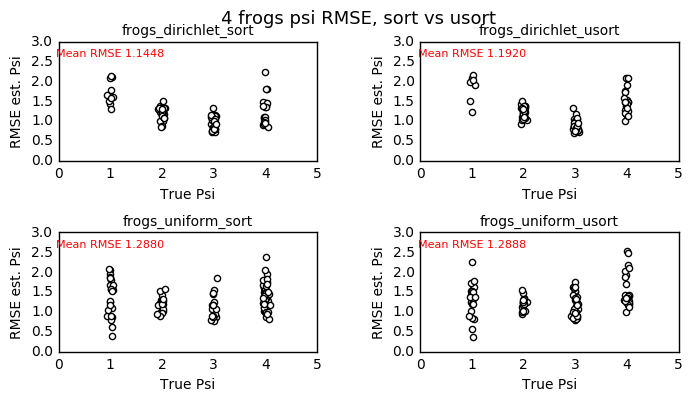

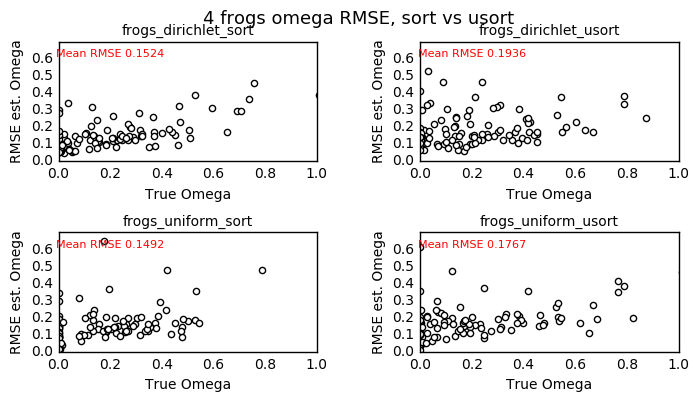

In [263]:
plotRMSE(FROG_OUTDIRS, 0, 2, 5, 3, "4 frogs psi RMSE, sort vs usort")
plotRMSE(FROG_OUTDIRS, 3, 5, 1, .7, "4 frogs omega RMSE, sort vs usort")